In [2]:
#importamos librerías
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#cargamos los datos
black_data = pd.read_csv("BlackFriday.csv")
black_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#visualizamos las variables numéricas de los datos
black_data.describe()
#verificamos los tipos de valor en cada celda
black_data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
cat_values = ["Gender", "Age", "Occupation", "City_Category", "Marital_Status", "Product_Category_1", 
              "Product_Category_2", "Product_Category_3"]
for column in cat_values:
    black_data[column] = black_data[column].astype('category')
black_data.dtypes

User_ID                          int64
Product_ID                      object
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category_1            category
Product_Category_2            category
Product_Category_3            category
Purchase                         int64
dtype: object

In [6]:
#Suma de valores pérdidos en cada columna. Pandas reconoce tanto una celda vacía como el valor NA como NaN
#https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
black_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
#verificamos si hay valores pérdidos con otras sintaxis
#lista con valores NA comunes
missing_values = ["n/a", "na", "--", "Na"]
black_data = pd.read_csv("BlackFriday.csv", na_values= missing_values)
black_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [8]:
#verificamos la correlación entre variables para verificar si las variables con valores pérdidos tienen alguna 
#correlación alta con otra variables
black_data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


In [9]:
#verificamos el nro de filas que tienen valores pérdidos en las 2 variables
len(black_data[black_data['Product_Category_2'].isnull() & black_data['Product_Category_2'].isnull()])


166986

<BarContainer object of 18 artists>

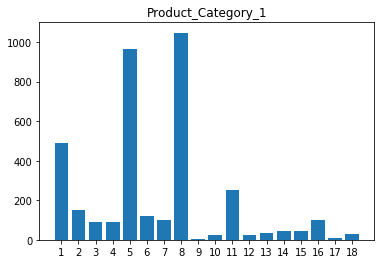

In [10]:
#verificamos la distribución de Product_Category_1 para comparar con los valores pérdidos de Product_Category_2 y
#Product_Category_3
prod_1 = black_data['Product_ID'].groupby(black_data['Product_Category_1']).nunique()
prod_2 = black_data['Product_ID'].groupby(black_data['Product_Category_2']).nunique()
prod_3 = black_data['Product_ID'].groupby(black_data['Product_Category_2']).nunique()
prod_1

bins = np.sort(black_data['Product_Category_1'].unique())
plt.xticks(bins)
plt.title('Product_Category_1')
plt.bar(bins, prod_1)

In [11]:
prod_2
prod_3

Product_Category_2
2.0     127
3.0      12
4.0     146
5.0     128
6.0      60
7.0       4
8.0     353
9.0      20
10.0     14
11.0     70
12.0     45
13.0     51
14.0    317
15.0    138
16.0    221
17.0     76
18.0     18
Name: Product_ID, dtype: int64

In [12]:
#sustituimos los valores pérdidos de Product_category_2 y Product_Categori_3 por 0
bf_data = black_data.fillna(0)
bf_data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Text(0,0.5,'Purchase ($)')

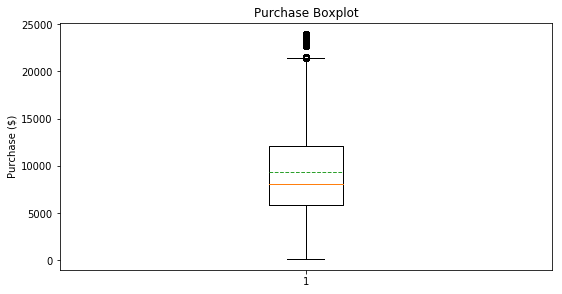

In [13]:
#Representamos el gráfico de cajas de la variable "Purchase" y vemos que existen valores extremos 
plt.figure(figsize=[30,10])
plt.subplot(231)
cajas = plt.boxplot(x=bf_data['Purchase'], showmeans = True, meanline = True)
plt.title('Purchase Boxplot')
plt.ylabel('Purchase ($)')

In [14]:
# Almacenamos los valores extremos en una lista
outliers = list(cajas["fliers"][0].get_data()[1])

# Comprobamos la longitud para ver cuántos registros se consideran extremos.
print "Num. extremos", len(outliers)
print "Num. total", len(bf_data)

# Borramos los datos extremos
bf_data = bf_data[~bf_data.Purchase.isin(outliers)]

# Comparamos las longitudes antes y después
print "Num. sin extremos", len(bf_data)

Num. extremos 2665
Num. total 537577
Num. sin extremos 534912


In [15]:
# (solo informativo)

# Número de valores diferentes por campo
print('Número de valores distintos: \n')
for i in bf_data.columns:
    print i, ':',bf_data[i].nunique()
    
# Tipo de datos de cada campo
print('\nTipo de datos: \n')
print (bf_data.info())

# Matriz de covarianzas 
print('\nMatriz de covarianzas: \n')
bf_data.cov()

Número de valores distintos: 

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 18
Product_Category_3 : 16
Purchase : 16928

Tipo de datos: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534912 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       534912 non-null int64
Product_ID                    534912 non-null object
Gender                        534912 non-null object
Age                           534912 non-null object
Occupation                    534912 non-null int64
City_Category                 534912 non-null object
Stay_In_Current_City_Years    534912 non-null object
Marital_Status                534912 non-null int64
Product_Category_1            534912 non-null int64
Product_Category_2            534912 non-null float64
Product_Category_3            534912 non-null float64
Purchase                      5349

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,2.938243e+06,-259.157409,15.673851,22.231876,34.977127,44.180688,3.995448e+04
Occupation,-2.591574e+02,42.551512,0.078639,-0.212696,0.268939,0.488749,6.621299e+02
Marital_Status,1.567385e+01,0.078639,0.241651,0.037164,0.002677,-0.013706,-2.118050e+00
Product_Category_1,2.223188e+01,-0.212696,0.037164,13.981018,-1.081807,-9.175687,-6.262855e+03
Product_Category_2,3.497713e+01,0.268939,0.002677,-1.081807,38.481980,3.506119,8.125750e+02
Product_Category_3,4.418069e+01,0.488749,-0.013706,-9.175687,3.506119,39.227552,8.913526e+03
Purchase,3.995448e+04,662.129868,-2.118050,-6262.854928,812.574982,8913.525816,2.396630e+07


# Análisis de datos

## Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar)

In [12]:
for column in cat_values:
    bf_data[column] = bf_data[column].astype('category')
bf_data.dtypes

User_ID                          int64
Product_ID                      object
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category_1            category
Product_Category_2            category
Product_Category_3            category
Purchase                         int64
dtype: object

In [13]:
#análisis estadístico descriptivo
bf_data.describe()

,User_ID,Purchase
count,5.375770e+05,537577.000000
mean,1.002992e+06,9333.859853
std,1.714393e+03,4981.022133
min,1.000001e+06,185.000000
25%,1.001495e+06,5866.000000
50%,1.003031e+06,8062.000000
75%,1.004417e+06,12073.000000
max,1.006040e+06,23961.000000


Observamos que la única variable continua es Purchase. Al utilizar el comando describe observamos también User_ID, pero en este caso al ser la identificación del usuario no tiene sentido los resultados que se indican de las medidas estadísticas de tendencia central y de dispersión.

## Comprobación de la normalidad y homogeneidad de la varianza 

(array([ 32175.,  57237., 130109., 104444.,  79179.,  24980.,  63928.,
         13437.,  29772.,   2316.]),
 array([  185. ,  2562.6,  4940.2,  7317.8,  9695.4, 12073. , 14450.6,
        16828.2, 19205.8, 21583.4, 23961. ]),
 <a list of 10 Patch objects>)

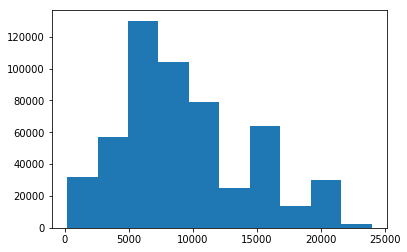

In [14]:
#visualizamos la distribución de la variable Purchase
plt.hist(bf_data['Purchase'])

In [15]:
#Aplicamos el test shapiro sobre una muestra porque en la primera prueba obtenemos una advertencia de que el resultado 
#de p-value no es preciso para muestras mayores a 5000
stats.shapiro(bf_data['Purchase'].sample(n=5000, random_state=1))

(0.9529308080673218, 2.2448276752338526e-37)

In [16]:
#Analizamos la normalidad de la variable Purchase sobre las muestras de hombres y mujeres
purch_female = stats.shapiro(bf_data['Purchase'][bf_data['Gender']=='F'].sample(n=4000, random_state =1))
purch_male = stats.shapiro(bf_data['Purchase'][bf_data['Gender']=='M'].sample(n=4000, random_state =1))
if purch_female[1]<0.05:
    print ("la variable no es normal")
else:
    print ("la variable es normal")

la variable no es normal


In [17]:
#Analizamos la normalidad de la variable Purchase sobre las muestras de las variables Gender, Age, 
#City_category y Marital_Status

bf_data['Marital_Status'] = bf_data['Marital_Status'].astype('string')
data_select = ['Gender', 'Age', 'City_Category', 'Marital_Status']
for value in data_select:
    var = bf_data[value].unique()
    for i in range(len(var)):
        shap_num = stats.shapiro(bf_data['Purchase'][bf_data[value]==var[i]].sample(n=4000, random_state =1))
        shap_dict = {value +  var[i]: shap_num[1]}
        print shap_dict
        

{'GenderF': 4.860132656335689e-37}
{'GenderM': 1.622617137044561e-33}
{'Age0-17': 5.367863269783801e-34}
{'Age55+': 4.00766833593923e-35}
{'Age26-35': 1.563721162210207e-35}
{'Age46-50': 1.515031072693757e-34}
{'Age51-55': 9.342797876266847e-34}
{'Age36-45': 2.411296612794047e-34}
{'Age18-25': 1.1716942266898624e-35}
{'City_CategoryA': 1.5349875573779245e-35}
{'City_CategoryC': 3.27519863528204e-34}
{'City_CategoryB': 1.7345011772318997e-35}
{'Marital_Status0': 3.9950443990486123e-35}
{'Marital_Status1': 2.230614751083637e-35}


In [18]:
#Probamos la homosteceidad 

for value in data_select:
    var = bf_data[value].unique()
    for i in range(len(var)):
        flig_num = stats.fligner(bf_data['Purchase'], bf_data['Purchase'][bf_data[value]==var[i]])
        if flig_num[1] <0.05:
            flig_stat = "se rechaza hipótesis nula de homosteceidad"
        elif flig_num[1] >= 0.05:
            flig_stat = "se acepta la hihttp://localhost:8888/notebooks/Black_friday_cleaning.ipynb#pótesis nula de homosteceidad"
        flig_dict = {value +  var[i]: flig_stat}
        print flig_dict
        

{'GenderF': 'se rechaza hip\xc3\xb3tesis nula de homosteceidad'}
{'GenderM': 'se rechaza hip\xc3\xb3tesis nula de homosteceidad'}
{'Age0-17': 'se rechaza hip\xc3\xb3tesis nula de homosteceidad'}
{'Age55+': 'se rechaza hip\xc3\xb3tesis nula de homosteceidad'}
{'Age26-35': 'se acepta la hihttp://localhost:8888/notebooks/Black_friday_cleaning.ipynb#p\xc3\xb3tesis nula de homosteceidad'}
{'Age46-50': 'se rechaza hip\xc3\xb3tesis nula de homosteceidad'}
{'Age51-55': 'se acepta la hihttp://localhost:8888/notebooks/Black_friday_cleaning.ipynb#p\xc3\xb3tesis nula de homosteceidad'}
{'Age36-45': 'se acepta la hihttp://localhost:8888/notebooks/Black_friday_cleaning.ipynb#p\xc3\xb3tesis nula de homosteceidad'}
{'Age18-25': 'se rechaza hip\xc3\xb3tesis nula de homosteceidad'}
{'City_CategoryA': 'se rechaza hip\xc3\xb3tesis nula de homosteceidad'}
{'City_CategoryC': 'se rechaza hip\xc3\xb3tesis nula de homosteceidad'}
{'City_CategoryB': 'se rechaza hip\xc3\xb3tesis nula de homosteceidad'}
{'Marital

In [19]:
stats.fligner(bf_data['Purchase'], bf_data['Age']=='M')

FlignerResult(statistic=701234.3319436846, pvalue=0.0)

## Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes. 